In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
from astropy.io import ascii
import os
import sys
from ipywidgets import interactive, widgets,fixed
from IPython.display import Audio, display
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (11., 8.0)
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
rcParams['axes.labelsize']='x-large'
rcParams['legend.fontsize']=17.
from scipy.integrate import quad
from scipy.optimize import curve_fit
seaborn.despine()
seaborn.set_style('white', {'axes.linewidth': 0.5, 'axes.edgecolor':'black'})
seaborn.despine(left=True)
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
sneqCF1=np.loadtxt('sneqCF')
sneqCF2=np.loadtxt('sneqCF2')
sneqCF3=np.loadtxt('sneqCF3')
sneqCF15=np.loadtxt('sneq1-5')
sneqCF57=np.loadtxt('sneq5-7')
sneqCF15HI=np.loadtxt('sneq1-5HI')
sneqCF57HI=np.loadtxt('sneq47HI')
cooltable=np.loadtxt('cooltable.dat')
H2CF15=np.loadtxt('H2CF1-5')
H2CF15H2=np.loadtxt('H2CF1-5H2')
H2CF15HI=np.loadtxt('H2CF1-5HI')
H2CF59=np.loadtxt('H2CF5-9')

In [4]:
H2CF = np.copy(H2CF15)
H2CF=np.concatenate((H2CF,H2CF59))

In [5]:
sneqCF = np.copy(sneqCF15)
sneqCF=np.concatenate((sneqCF,sneqCF57))
sneqCF=np.concatenate((sneqCF,sneqCF1))
sneqCF=np.concatenate((sneqCF,sneqCF2))
sneqCF=np.concatenate((sneqCF,sneqCF3))

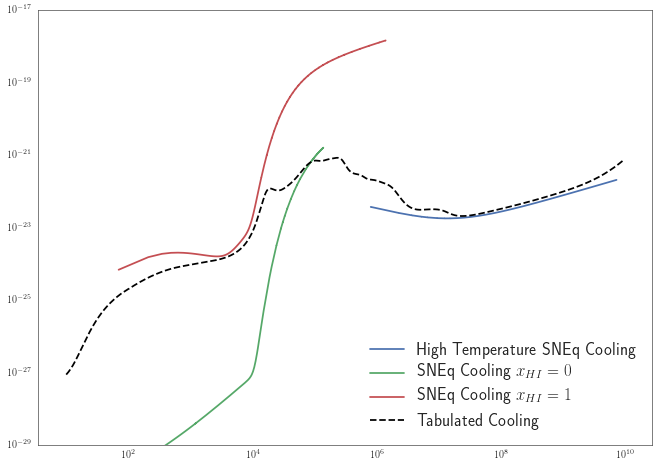

In [6]:
plt.loglog(sneqCF1[:,0],sneqCF1[:,1],label='High Temperature SNEq Cooling')
plt.loglog(sneqCF15[:,0],sneqCF15[:,1],label='SNEq Cooling $x_{HI}=0$')
plt.loglog(sneqCF15HI[:,0],sneqCF15HI[:,1],label='SNEq Cooling $x_{HI}=1$')
plt.loglog(cooltable[:,0],cooltable[:,1],'--',color='black',label='Tabulated Cooling')
#plt.xlim([1e5,None]
plt.ylim([1e-29,1e-17])
plt.legend(loc='best')
datafolder='../Document/DataImages/'
plt.savefig(datafolder+'SNEQcooling-function.png',bbox_inches='tight',format='png', dpi=100)

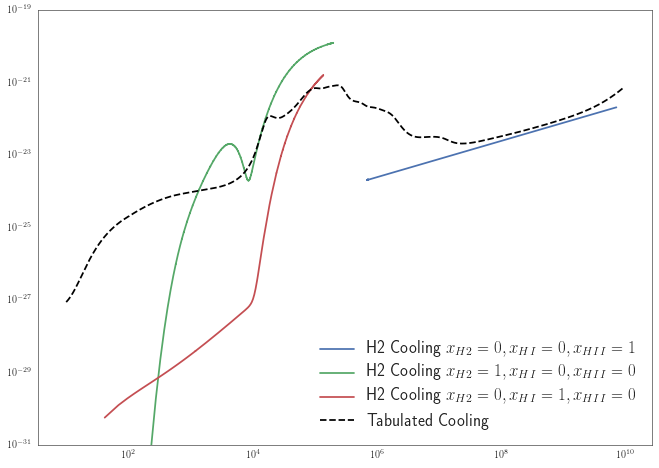

In [7]:
plt.loglog(H2CF[:,0][H2CF[:,0]>7e5],H2CF[:,1][H2CF[:,0]>7e5],label='H2 Cooling $x_{H2}=0,x_{HI}=0,x_{HII}=1$')
plt.loglog(H2CF15H2[:,0][H2CF15H2[:,0]<2e5],H2CF15H2[:,1][H2CF15H2[:,0]<2e5],label='H2 Cooling $x_{H2}=1,x_{HI}=0,x_{HII}=0$')
plt.loglog(H2CF15HI[:,0],H2CF15HI[:,1],label='H2 Cooling $x_{H2}=0,x_{HI}=1,x_{HII}=0$')
plt.loglog(cooltable[:,0],cooltable[:,1],'--',color='black',label='Tabulated Cooling')
#plt.xlim([1e5,None]
plt.ylim([1e-31,1e-19])
plt.legend(loc='best')
datafolder='../Document/DataImages/'
plt.savefig(datafolder+'Η2cooling-function.png',bbox_inches='tight',format='png', dpi=100)

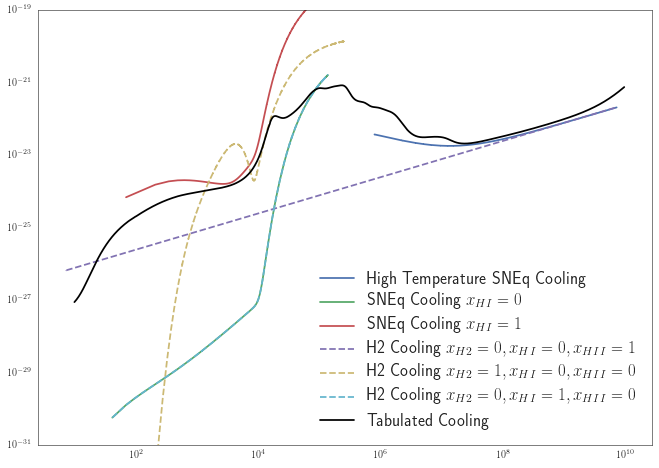

In [8]:
plt.loglog(sneqCF1[:,0],sneqCF1[:,1],label='High Temperature SNEq Cooling')
plt.loglog(sneqCF15[:,0],sneqCF15[:,1],label='SNEq Cooling $x_{HI}=0$')
plt.loglog(sneqCF15HI[:,0],sneqCF15HI[:,1],label='SNEq Cooling $x_{HI}=1$') 
#plt.loglog(sneqCF57HI[:,0],sneqCF57HI[:,1],'*-',label='SNEq Cooling')
#plt.loglog(sneqCF3[:,0],sneqCF3[:,1],label='SNEq Cooling')
plt.loglog(H2CF[:,0],H2CF[:,1],'--',label='H2 Cooling $x_{H2}=0,x_{HI}=0,x_{HII}=1$')
plt.loglog(H2CF15H2[:,0],H2CF15H2[:,1],'--',label='H2 Cooling $x_{H2}=1,x_{HI}=0,x_{HII}=0$')
plt.loglog(H2CF15HI[:,0],H2CF15HI[:,1],'--',label='H2 Cooling $x_{H2}=0,x_{HI}=1,x_{HII}=0$')
plt.loglog(cooltable[:,0],cooltable[:,1],color='black',label='Tabulated Cooling')
#plt.xlim([1e5,None]
plt.ylim([1e-31,1e-19])
plt.legend(loc='best')
datafolder='../Document/DataImages/'
plt.savefig(datafolder+'cooling-function.png',bbox_inches='tight',format='png', dpi=100)

In [5]:
T=cooltable[:,0]
L=cooltable[:,1]

In [6]:
Ti=np.logical_and(T>1e8,T<1e9)

In [7]:
def ff(x,b,c): return b*x +c 

In [8]:
pars,dev2=curve_fit(ff,np.log10(T[Ti]),np.log10(L[Ti]),[1.,1.])
pars,dev2

(array([  0.47399369, -26.28953117]),
 array([[  2.96428335e-06,  -2.52076606e-05],
        [ -2.52076606e-05,   2.14607165e-04]]))

In [9]:
TT=np.logspace(8,16,400)

$$
\log y =b\log x +c \\
y= x^{b} 10^{c} 
$$

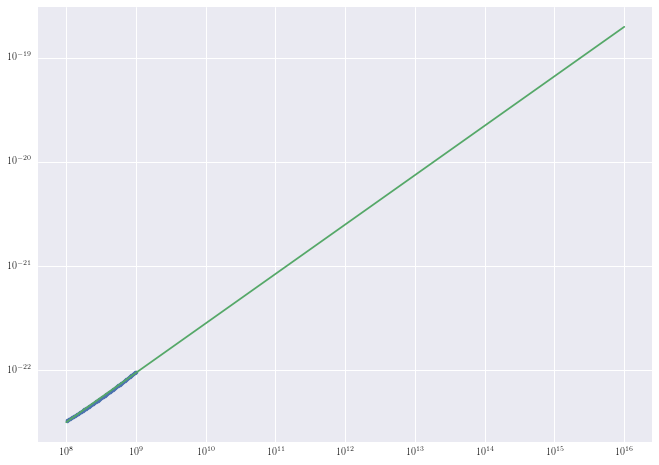

In [10]:
plt.loglog(T[Ti],L[Ti],'.')
plt.loglog(TT,TT**pars[0] *10.**(pars[1]))

In [11]:
Tnew=np.append(T[T<1e8],TT)
Lnew=np.append(L[T<1e8],TT**pars[0] *10.**(pars[1]))

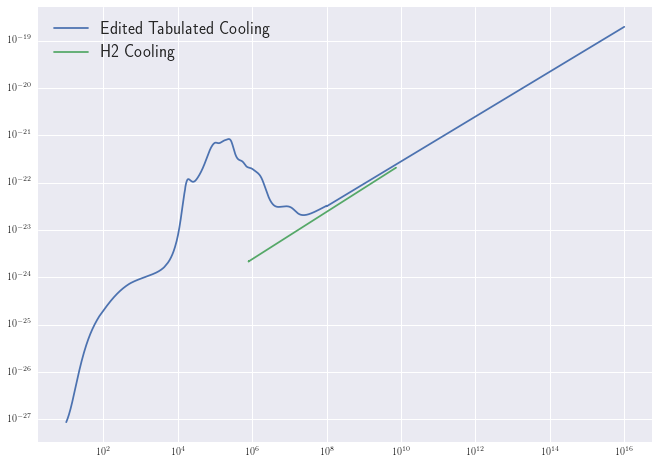

In [12]:
plt.loglog(Tnew,Lnew,label='Edited Tabulated Cooling')
plt.loglog(H2CF[:,0],H2CF[:,1],label='H2 Cooling')
plt.legend()

In [115]:
np.savetxt('cooltable_new.dat',np.c_[Tnew,Lnew])